# Ecommerce Amazon Sales Data -2022

Process:
Data cleaning
EDA - Initial 
Correlation - Qty and Amount
Clustering analysis : Elbow method/K means
Order cancellation Prediction : Random Forest


In [3]:
# Load libraries
library(dplyr)
library(lubridate)
library(ggplot2)
amazon_sales_data <- read.csv('ecommdb_amazon.csv')

# summary
head(amazon_sales_data)

# Remove unwanted columns
amazon_sales_data <- amazon_sales_data %>%
  select(-index, -Unnamed..22)
# Remove duplicate rows
amazon_sales_data <- amazon_sales_data %>%
  distinct()

# View the column names
colnames(amazon_sales_data)

# Standardize date format in 'Date' column
# Convert 'Date' column to a uniform format (YYYY-MM-DD)
amazon_sales_data$Date <- parse_date_time(amazon_sales_data$Date, orders = c("mdy", "mdy"))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




,index,Order.ID,Date,Status,Fulfilment,Sales.Channel,ship.service.level,Style,SKU,Category,⋯,currency,Amount,ship.city,ship.state,ship.postal.code,ship.country,promotion.ids,B2B,fulfilled.by,Unnamed..22
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<lgl>
1,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,⋯,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,,FALSE,Easy Ship,NA
2,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,⋯,INR,406.00,BENGALURU,KARNATAKA,560085,IN,"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Universal Merchant AAT-7X3XCTYG64VBE,Amazon PLCC Free-Financing Universal Merchant AAT-7CHGD3WTS3MHM,Amazon PLCC Free-Financing Universal Merchant AAT-26ZDKNME27X42,Amazon PLCC Free-Financing Universal Merchant AAT-4ZF5KN6E4LJK4,Amazon PLCC Free-Financing Universal Merchant AAT-7RCXIKUAX7DDY,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",FALSE,Easy Ship,NA
3,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,⋯,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,TRUE,,NA
4,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,⋯,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,,FALSE,Easy Ship,NA
5,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,⋯,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,,FALSE,,NA
6,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,⋯,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,,NA


[1] "Order.ID"           "Date"               "Status"            
 [4] "Fulfilment"         "Sales.Channel"      "ship.service.level"
 [7] "Style"              "SKU"                "Category"          
[10] "Size"               "ASIN"               "Courier.Status"    
[13] "Qty"                "currency"           "Amount"            
[16] "ship.city"          "ship.state"         "ship.postal.code"  
[19] "ship.country"       "promotion.ids"      "B2B"               
[22] "fulfilled.by"

In [4]:
# Check the cleaned date format
tail(amazon_sales_data$Date)
str(amazon_sales_data$Date)

[1] "2022-05-31 UTC" "2022-05-31 UTC" "2022-05-31 UTC" "2022-05-31 UTC"
[5] "2022-05-31 UTC" "2022-05-31 UTC"

 POSIXct[1:128969], format: "2022-04-30" "2022-04-30" "2022-04-30" "2022-04-30" "2022-04-30" ...


In [5]:
az <- amazon_sales_data
head(az)

,Order.ID,Date,Status,Fulfilment,Sales.Channel,ship.service.level,Style,SKU,Category,Size,⋯,Qty,currency,Amount,ship.city,ship.state,ship.postal.code,ship.country,promotion.ids,B2B,fulfilled.by
,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>
1,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,⋯,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,,FALSE,Easy Ship
2,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,⋯,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,"Amazon PLCC Free-Financing Universal Merchant AAT-WNKTBO3K27EJC,Amazon PLCC Free-Financing Universal Merchant AAT-QX3UCCJESKPA2,Amazon PLCC Free-Financing Universal Merchant AAT-5QQ7BIYYQEDN2,Amazon PLCC Free-Financing Universal Merchant AAT-DSJ2QRXXWXVMQ,Amazon PLCC Free-Financing Universal Merchant AAT-CXJHMC2YJUK76,Amazon PLCC Free-Financing Universal Merchant AAT-CC4FAVTYR4X7C,Amazon PLCC Free-Financing Universal Merchant AAT-XXRCW6NZEPZI4,Amazon PLCC Free-Financing Universal Merchant AAT-CXNSLNBROFDW4,Amazon PLCC Free-Financing Universal Merchant AAT-R7GXNZWISTRFA,Amazon PLCC Free-Financing Universal Merchant AAT-WSJLDN3X7KEMO,Amazon PLCC Free-Financing Universal Merchant AAT-VL6FGQVGQVXUS,Amazon PLCC Free-Financing Universal Merchant AAT-EOKPWFWYW7Y6I,Amazon PLCC Free-Financing Universal Merchant AAT-ZYL5UPUNW6T62,Amazon PLCC Free-Financing Universal Merchant AAT-XVPICCHRWDCAI,Amazon PLCC Free-Financing Universal Merchant AAT-ETXQ3XXWMRXBG,Amazon PLCC Free-Financing Universal Merchant AAT-7X3XCTYG64VBE,Amazon PLCC Free-Financing Universal Merchant AAT-7CHGD3WTS3MHM,Amazon PLCC Free-Financing Universal Merchant AAT-26ZDKNME27X42,Amazon PLCC Free-Financing Universal Merchant AAT-4ZF5KN6E4LJK4,Amazon PLCC Free-Financing Universal Merchant AAT-7RCXIKUAX7DDY,Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,Amazon PLCC Free-Financing Universal Merchant AAT-WLBA4GZ52EAH4",FALSE,Easy Ship
3,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,⋯,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,TRUE,
4,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,⋯,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,,FALSE,Easy Ship
5,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,⋯,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,,FALSE,
6,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,⋯,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,FALSE,


In [6]:
summary(az)
str(az)
colSums(is.na(az))

   Order.ID              Date                           Status         
 Length:128969      Min.   :2022-03-31 00:00:00.00   Length:128969     
 Class :character   1st Qu.:2022-04-20 00:00:00.00   Class :character  
 Mode  :character   Median :2022-05-10 00:00:00.00   Mode  :character  
                    Mean   :2022-05-12 11:50:02.75                     
                    3rd Qu.:2022-06-04 00:00:00.00                     
                    Max.   :2022-06-29 00:00:00.00                     
                                                                       
  Fulfilment        Sales.Channel      ship.service.level    Style          
 Length:128969      Length:128969      Length:128969      Length:128969     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

'data.frame':	128969 obs. of  22 variables:
 $ Order.ID          : chr  "405-8078784-5731545" "171-9198151-1101146" "404-0687676-7273146" "403-9615377-8133951" ...
 $ Date              : POSIXct, format: "2022-04-30" "2022-04-30" ...
 $ Status            : chr  "Cancelled" "Shipped - Delivered to Buyer" "Shipped" "Cancelled" ...
 $ Fulfilment        : chr  "Merchant" "Merchant" "Amazon" "Merchant" ...
 $ Sales.Channel     : chr  "Amazon.in" "Amazon.in" "Amazon.in" "Amazon.in" ...
 $ ship.service.level: chr  "Standard" "Standard" "Expedited" "Standard" ...
 $ Style             : chr  "SET389" "JNE3781" "JNE3371" "J0341" ...
 $ SKU               : chr  "SET389-KR-NP-S" "JNE3781-KR-XXXL" "JNE3371-KR-XL" "J0341-DR-L" ...
 $ Category          : chr  "Set" "kurta" "kurta" "Western Dress" ...
 $ Size              : chr  "S" "3XL" "XL" "L" ...
 $ ASIN              : chr  "B09KXVBD7Z" "B09K3WFS32" "B07WV4JV4D" "B099NRCT7B" ...
 $ Courier.Status    : chr  "" "Shipped" "Shipped" "" ...
 $ Qty    

Order.ID               Date             Status         Fulfilment 
                 0                  0                  0                  0 
     Sales.Channel ship.service.level              Style                SKU 
                 0                  0                  0                  0 
          Category               Size               ASIN     Courier.Status 
                 0                  0                  0                  0 
               Qty           currency             Amount          ship.city 
                 0                  0               7792                  0 
        ship.state   ship.postal.code       ship.country      promotion.ids 
                 0                 33                  0                  0 
               B2B       fulfilled.by 
                 0                  0

In [7]:
az <- az %>%
  mutate(Amount = ifelse(is.na(Amount), 0, Amount))

# Verify the changes
summary(az$Amount)

# Check if there are still missing values in the Amount column
sum(is.na(az$Amount))



# Convert B2B column values from True/False to 'business'/'customer'
az <- az %>%
  mutate(customer_type = ifelse(B2B == TRUE, 'business', 'customer'))

# Convert the Date column to Date type
az$Date <- as.Date(az$Date, format = "%Y-%m-%d")

# Add a Month column
az <- az %>%
  mutate(Month = month(Date, label = TRUE))

# Filter to only include dates in March
march_data <- az %>%
  filter(month(Date) == 3)

# Get the number of unique days in March
unique_days_march <- n_distinct(march_data$Date)
print(unique_days_march)




   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   413.0   583.0   609.4   771.0  5584.0 

[1] 0

[1] 1


# A tibble: 9 × 2
  Category      Count
  <chr>         <int>
1 Set           50281
2 kurta         49874
3 Western Dress 15500
4 Top           10622
5 Ethnic Dress   1159
6 Blouse          926
7 Bottom          440
8 Saree           164
9 Dupatta           3
# A tibble: 13 × 2
   Status                        Count
   <chr>                         <int>
 1 Shipped                       77801
 2 Shipped - Delivered to Buyer  28769
 3 Cancelled                     18329
 4 Shipped - Returned to Seller   1953
 5 Shipped - Picked Up             973
 6 Pending                         658
 7 Pending - Waiting for Pick Up   281
 8 Shipped - Returning to Seller   145
 9 Shipped - Out for Delivery       35
10 Shipped - Rejected by Buyer      11
11 Shipping                          8
12 Shipped - Lost in Transit         5
13 Shipped - Damaged                 1


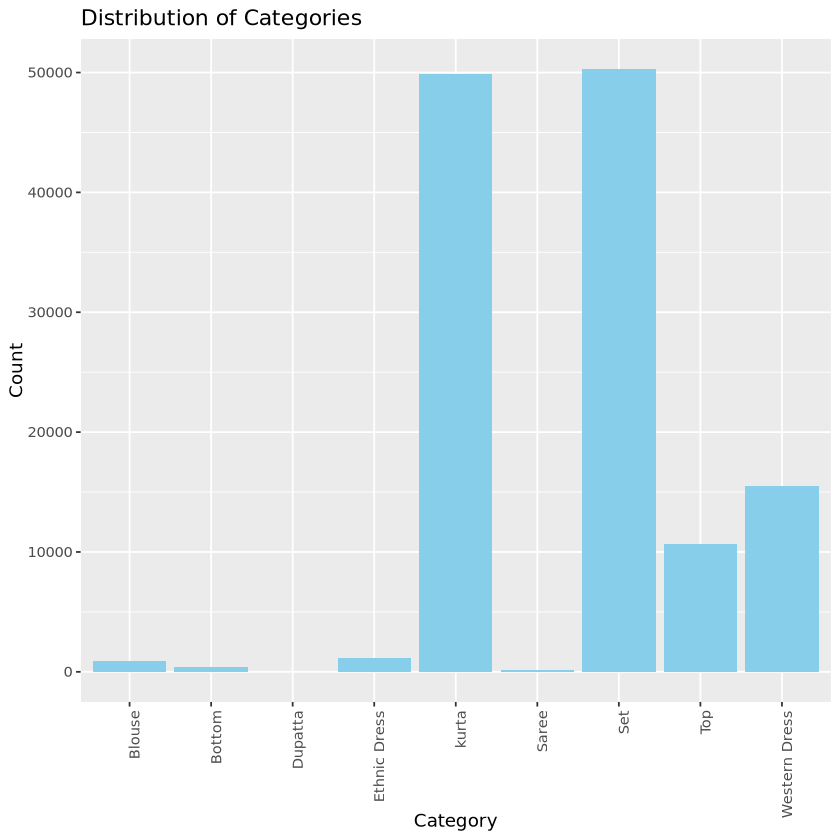

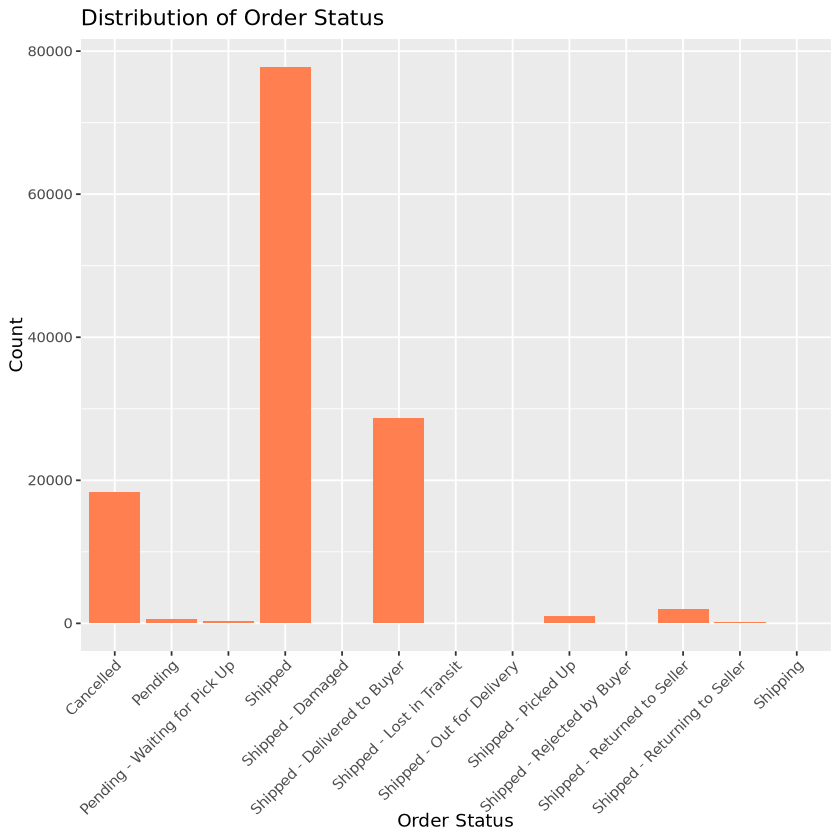

In [8]:
# Univariate Analysis
# 1. Categorical Variables
# Count of each Category
category_count <- az %>%
  group_by(Category) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))
print(category_count)

# Plotting the distribution of Categories
ggplot(az, aes(x = Category)) +
  geom_bar(fill = "skyblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Distribution of Categories", x = "Category", y = "Count")

# Count of each Status
status_count <- az %>%
  group_by(Status) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))
print(status_count)

# Plotting the distribution of Status
ggplot(az, aes(x = Status)) +
  geom_bar(fill = "coral") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribution of Order Status", x = "Order Status", y = "Count")





   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   413.0   583.0   609.4   771.0  5584.0 

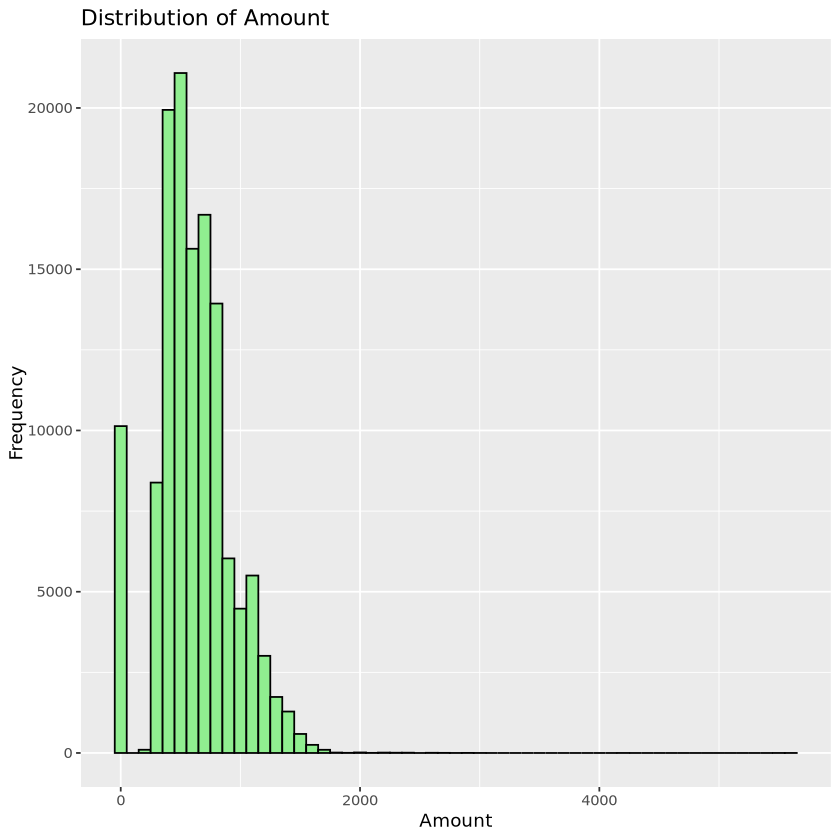

In [9]:
# 2. Numerical Variables
# Summary statistics for 'Amount'
summary(az$Amount)

# Plotting distribution of Amount
ggplot(az, aes(x = Amount)) +
  geom_histogram(binwidth = 100, fill = "lightgreen", color = "black") +
  labs(title = "Distribution of Amount", x = "Amount", y = "Frequency")

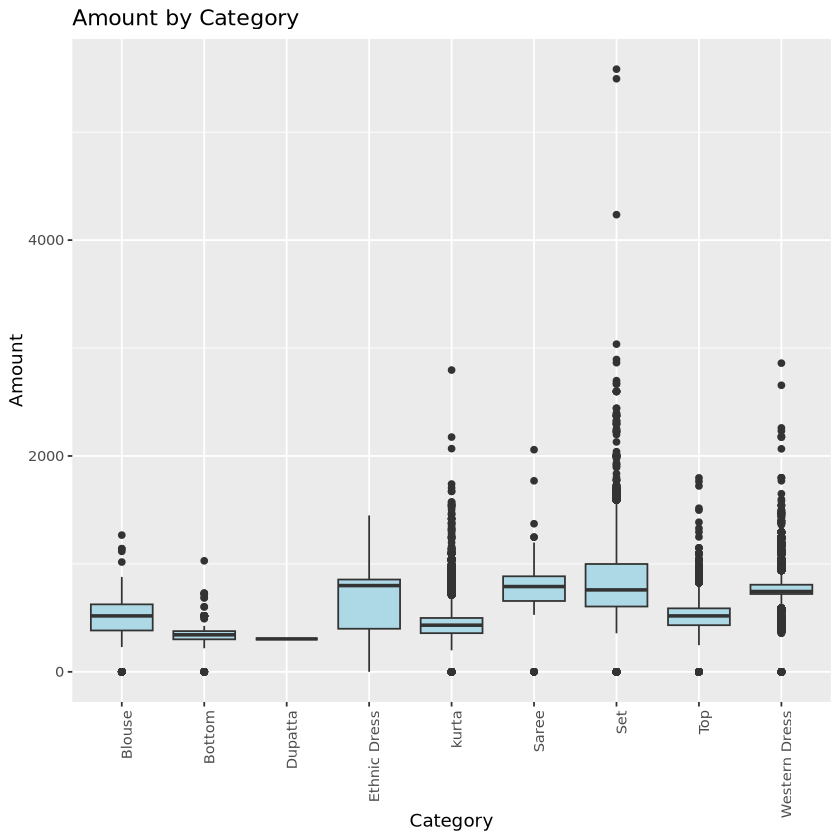

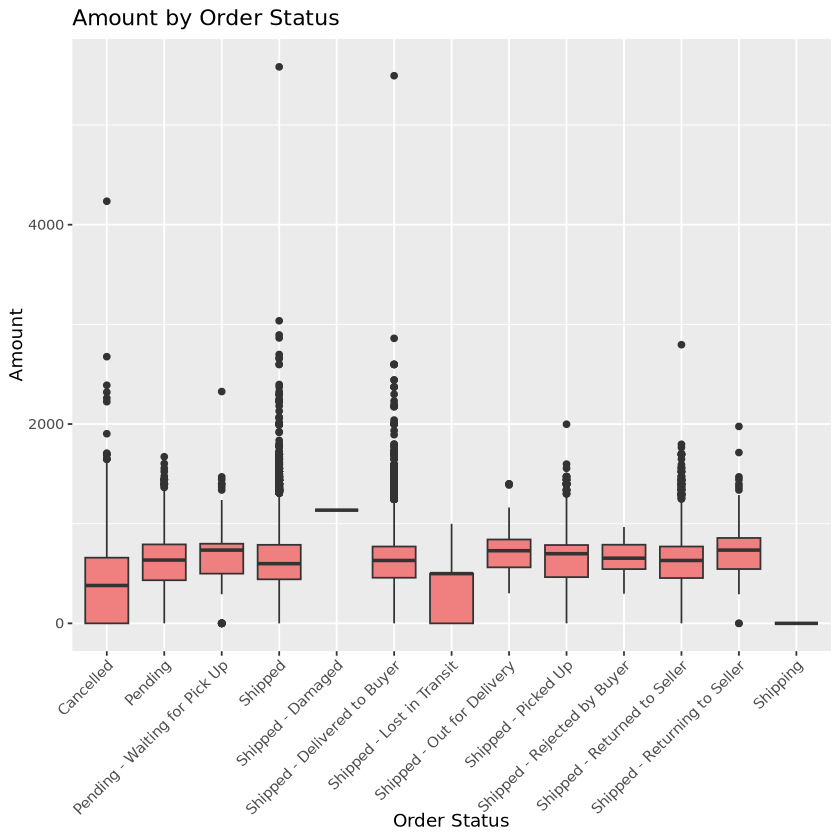

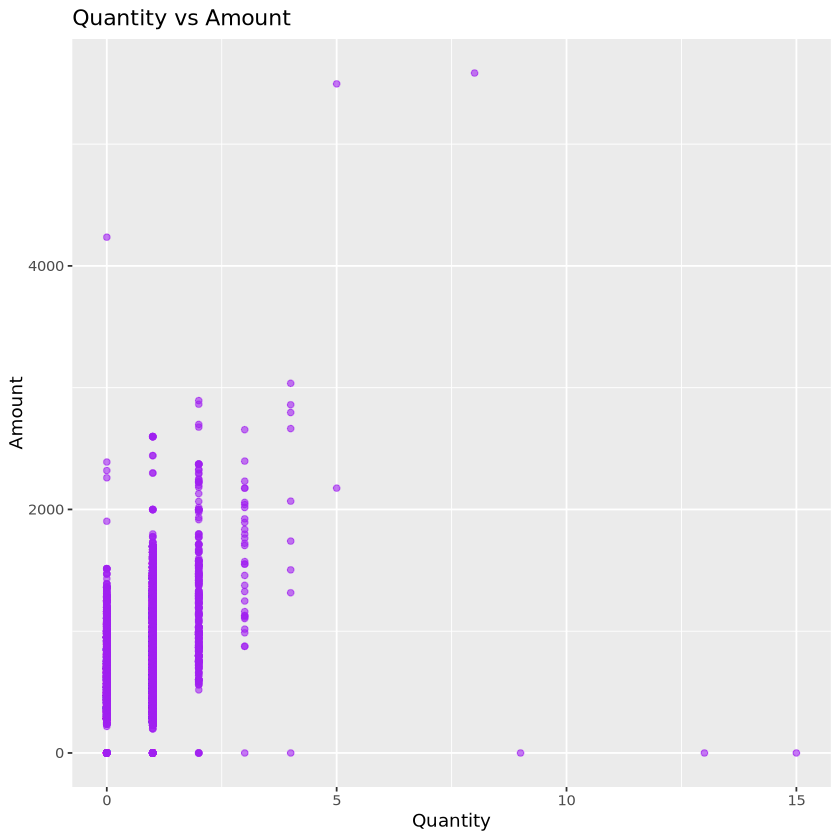

In [10]:
# Bivariate Analysis
# 1. Boxplot of Amount by Category
ggplot(az, aes(x = Category, y = Amount)) +
  geom_boxplot(fill = "lightblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Amount by Category", x = "Category", y = "Amount")

# 2. Boxplot of Amount by Status
ggplot(az, aes(x = Status, y = Amount)) +
  geom_boxplot(fill = "lightcoral") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Amount by Order Status", x = "Order Status", y = "Amount")

# 3. Scatter plot between Amount and Quantity
ggplot(az, aes(x = Qty, y = Amount)) +
  geom_point(color = "purple", alpha = 0.6) +
  labs(title = "Quantity vs Amount", x = "Quantity", y = "Amount")

In [11]:
# Correlation matrix for numerical variables
# Convert necessary columns to numeric if required
az$Qty <- as.numeric(az$Qty)
az$Amount <- as.numeric(az$Amount)
cor_matrix <- cor(select(az, Qty, Amount), use = "complete.obs")
print(cor_matrix)


#FINDINGS 
#The correlation between Qty and Amount is 0.39, indicating a moderate positive relationship.
#This suggests that while there is some dependency, the number of items purchased does not significantly influence the total amount spent.
#Amazon orders are not highly dependent on the quantity of products bought, implying other factors play a larger role in determining total order value.

             Qty    Amount
Qty    1.0000000 0.3910213
Amount 0.3910213 1.0000000


# Clustering Analysis

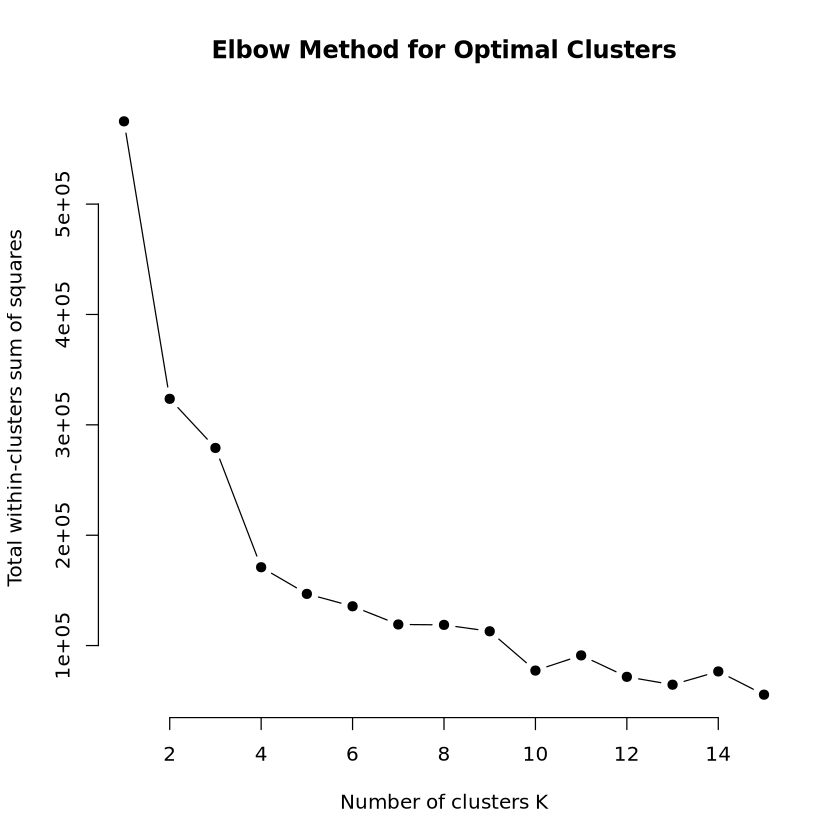

In [12]:

library(cluster)

# Data Preparation
# Make sure to use the exact column names in the dataset
clustering_data <- az %>%
  select(Qty, Amount, `Category`, `Sales.Channel`, `Fulfilment`) %>% # Exact column names
  na.omit()  # Remove rows with missing values

# Convert categorical variables to numerical factors for clustering
clustering_data$Category <- as.numeric(as.factor(clustering_data$Category))
clustering_data$`Sales.Channel` <- as.numeric(as.factor(clustering_data$`Sales.Channel`))
clustering_data$Fulfilment <- as.numeric(as.factor(clustering_data$Fulfilment))

# Step 2: Data Standardization
# Standardize numerical variables
clustering_data <- clustering_data %>%
  mutate(Qty = scale(Qty), Amount = scale(Amount))

# Step 3: Determine the optimal number of clusters using the Elbow method
set.seed(123)
wss <- (nrow(clustering_data)-1)*sum(apply(clustering_data,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(clustering_data, centers=i)$tot.withinss)

# Plot the Elbow method
plot(1:15, wss, type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares",
     main = "Elbow Method for Optimal Clusters")



    1     2 
72281 56688 

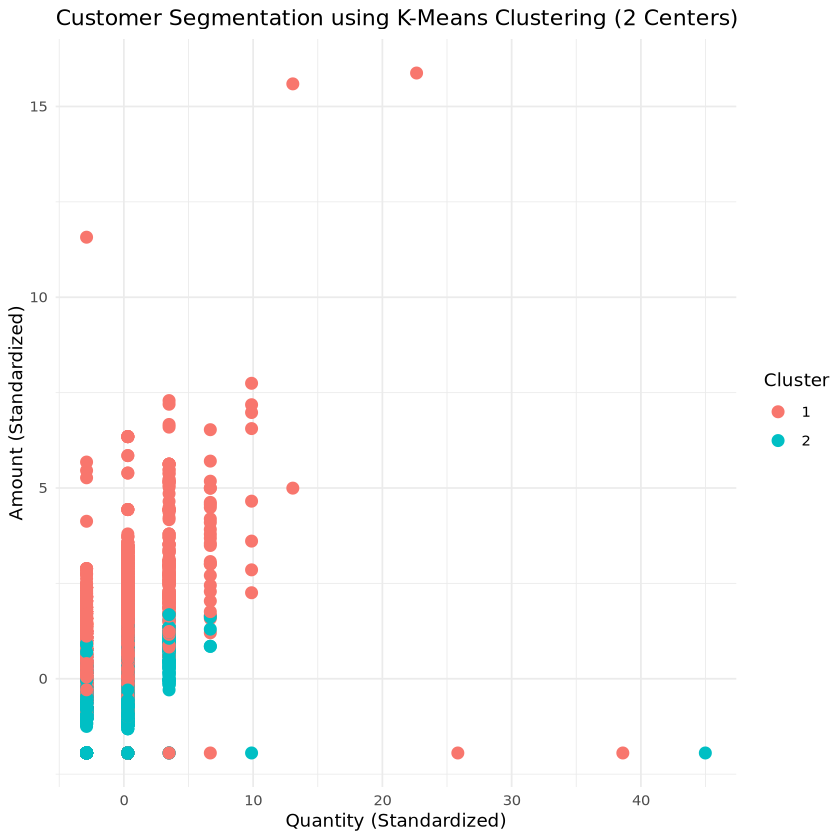

In [13]:
# Set the number of clusters to 2
set.seed(123)
kmeans_result <- kmeans(clustering_data, centers = 2, nstart = 25)

# Add cluster assignment to original data
clustering_data$Cluster <- kmeans_result$cluster

# View the cluster distribution
table(clustering_data$Cluster)

# Visualize clusters using a scatter plot
ggplot(clustering_data, aes(x = Qty, y = Amount, color = as.factor(Cluster))) +
  geom_point(size = 3) +
  labs(title = "Customer Segmentation using K-Means Clustering (2 Centers)",
       x = "Quantity (Standardized)",
       y = "Amount (Standardized)",
       color = "Cluster") +
  theme_minimal()


# A tibble: 2 × 4
  Cluster Avg_Qty Avg_Amount Count
    <int>   <dbl>      <dbl> <int>
1       1   0.945       773. 72281
2       2   0.853       400. 56688


`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


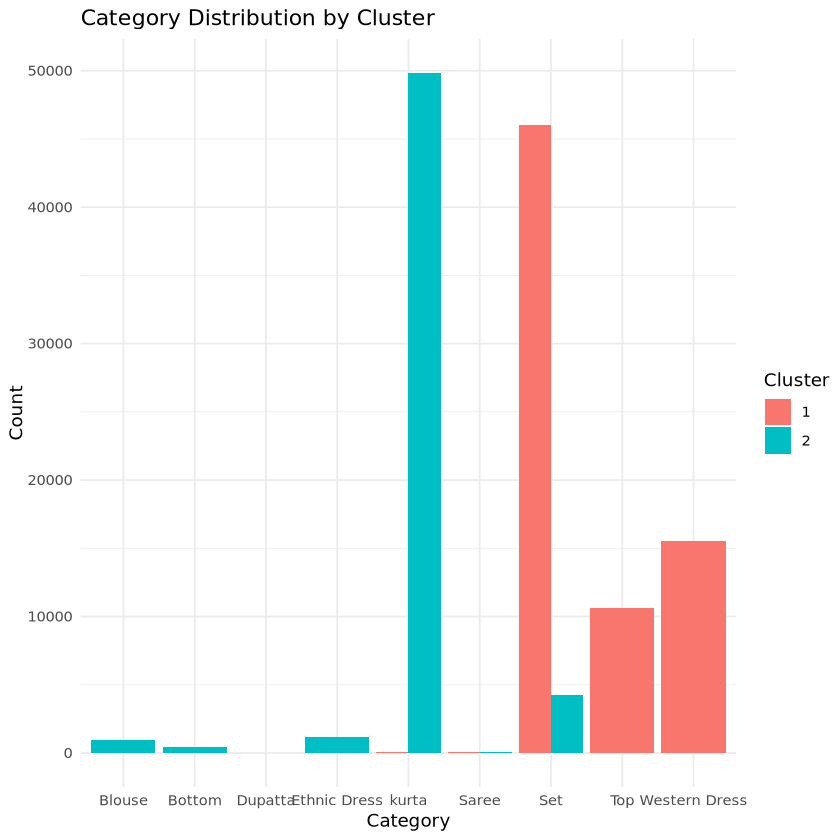

`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


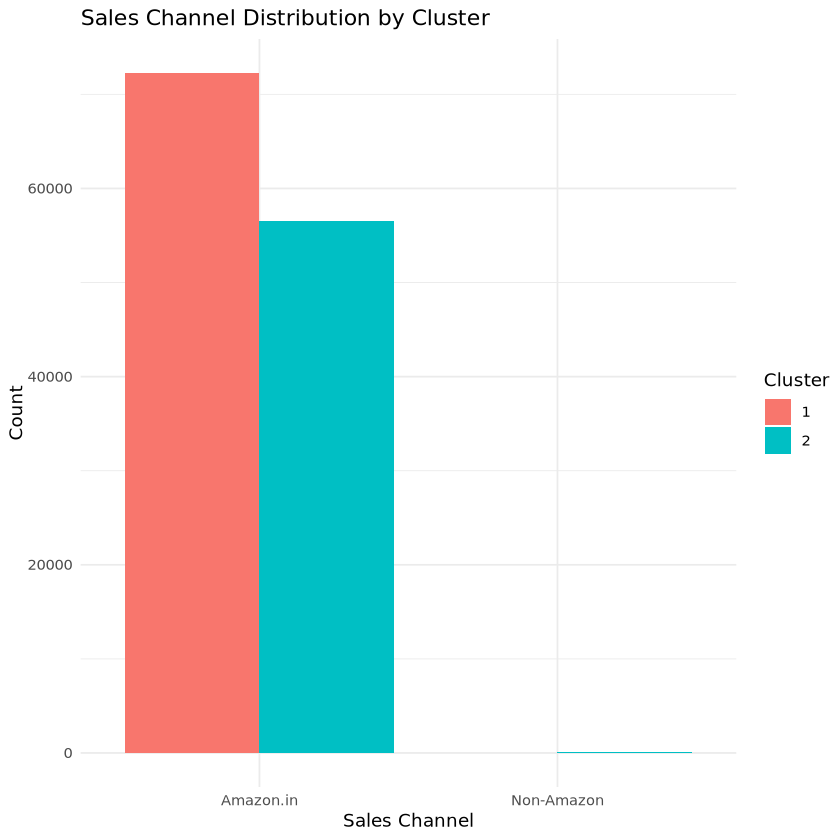

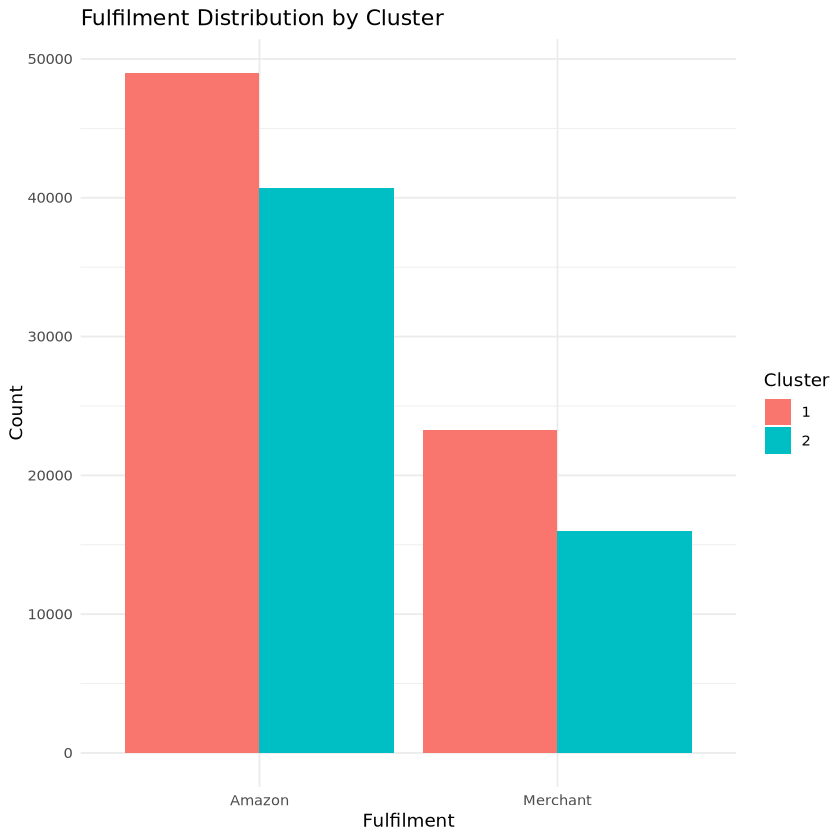

In [15]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Add Cluster labels to the original data
clustered_data <- az %>%
  mutate(Cluster = clustering_data$Cluster)

# Calculate summary statistics for each cluster
cluster_summary <- clustered_data %>%
  group_by(Cluster) %>%
  summarise(
    Avg_Qty = mean(Qty, na.rm = TRUE),
    Avg_Amount = mean(Amount, na.rm = TRUE),
    Count = n()
  )

# Print the summary statistics
print(cluster_summary)

# Distribution of Category in each Cluster
category_distribution <- clustered_data %>%
  group_by(Cluster, Category) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

# Visualize Category Distribution
ggplot(category_distribution, aes(x = Category, y = Count, fill = as.factor(Cluster))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Category Distribution by Cluster",
       x = "Category", y = "Count", fill = "Cluster") +
  theme_minimal()

# Distribution of Sales Channel in each Cluster
sales_channel_distribution <- clustered_data %>%
  group_by(Cluster, `Sales.Channel`) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

# Visualize Sales Channel Distribution
ggplot(sales_channel_distribution, aes(x = `Sales.Channel`, y = Count, fill = as.factor(Cluster))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Sales Channel Distribution by Cluster",
       x = "Sales Channel", y = "Count", fill = "Cluster") +
  theme_minimal()

#  Distribution of Fulfilment in each Cluster
fulfillment_distribution <- clustered_data %>%
  group_by(Cluster, Fulfilment) %>%
  summarise(Count = n()) %>%
  arrange(desc(Count))

# Visualize Fulfilment Distribution
ggplot(fulfillment_distribution, aes(x = Fulfilment, y = Count, fill = as.factor(Cluster))) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Fulfilment Distribution by Cluster",
       x = "Fulfilment", y = "Count", fill = "Cluster") +
  theme_minimal()


# A tibble: 2 × 5
  Cluster Avg_Qty Avg_Amount Avg_Size Courier_Distinct_Count
    <int>   <dbl>      <dbl>    <dbl>                  <int>
1       1   0.945       773.     7.40                      4
2       2   0.853       400.     7.30                      4


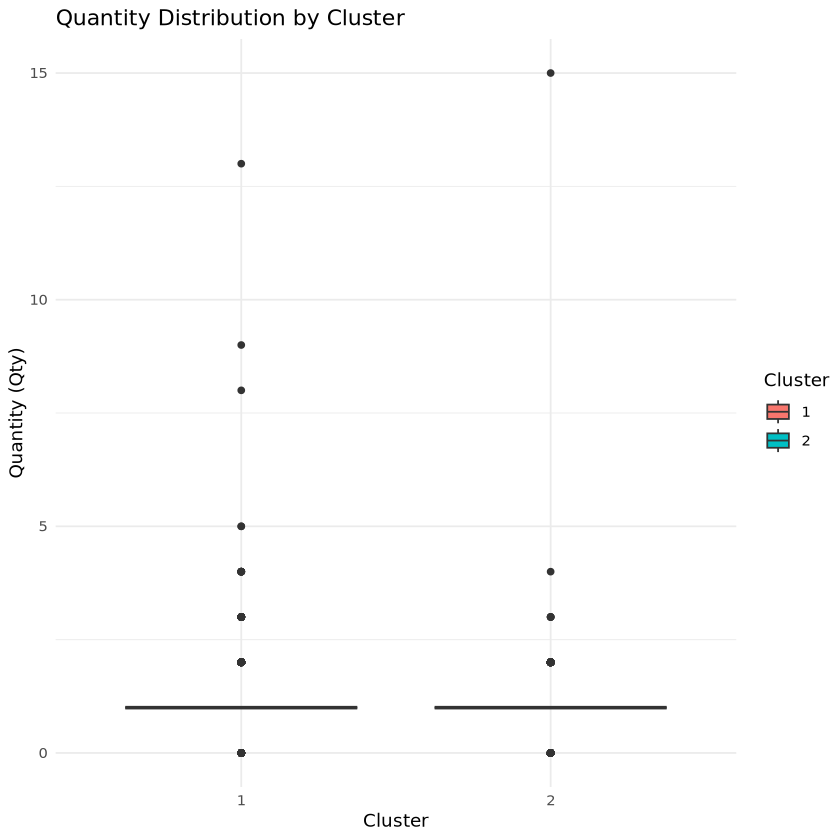

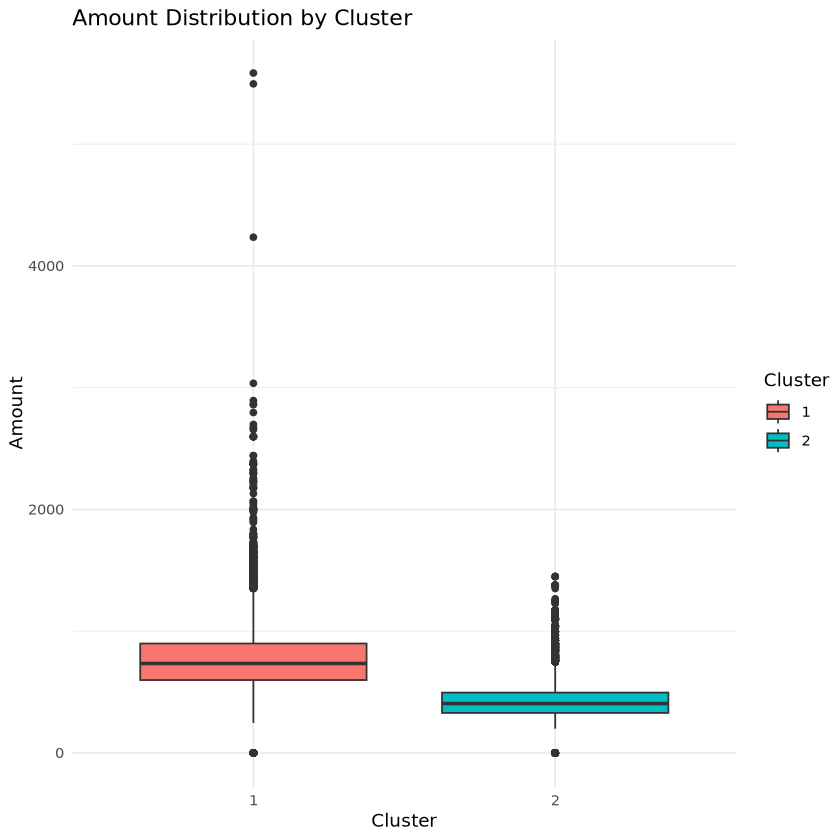

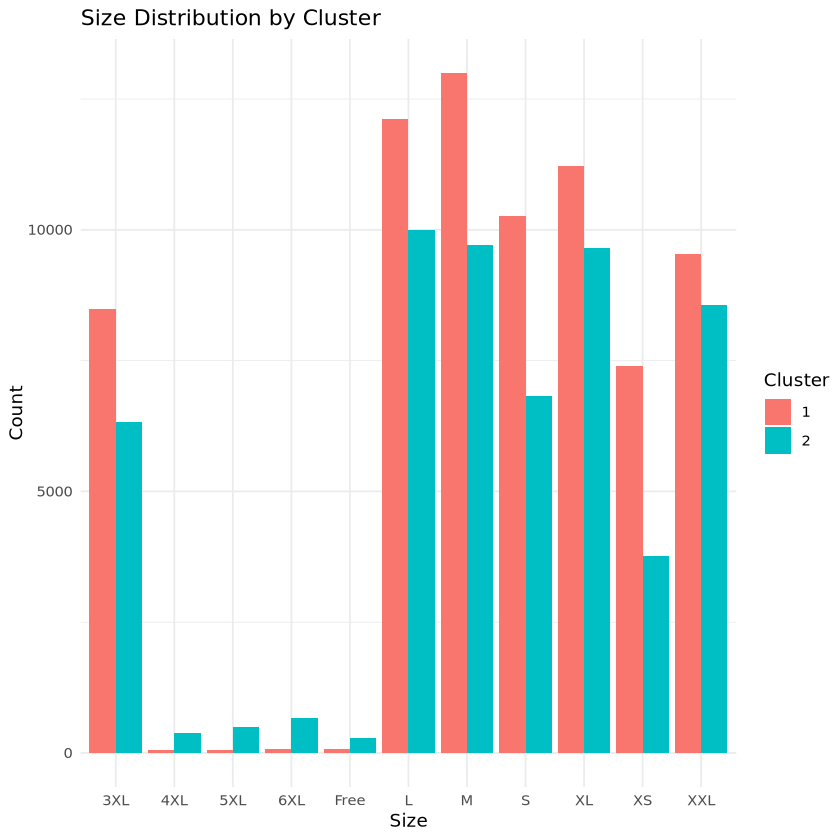

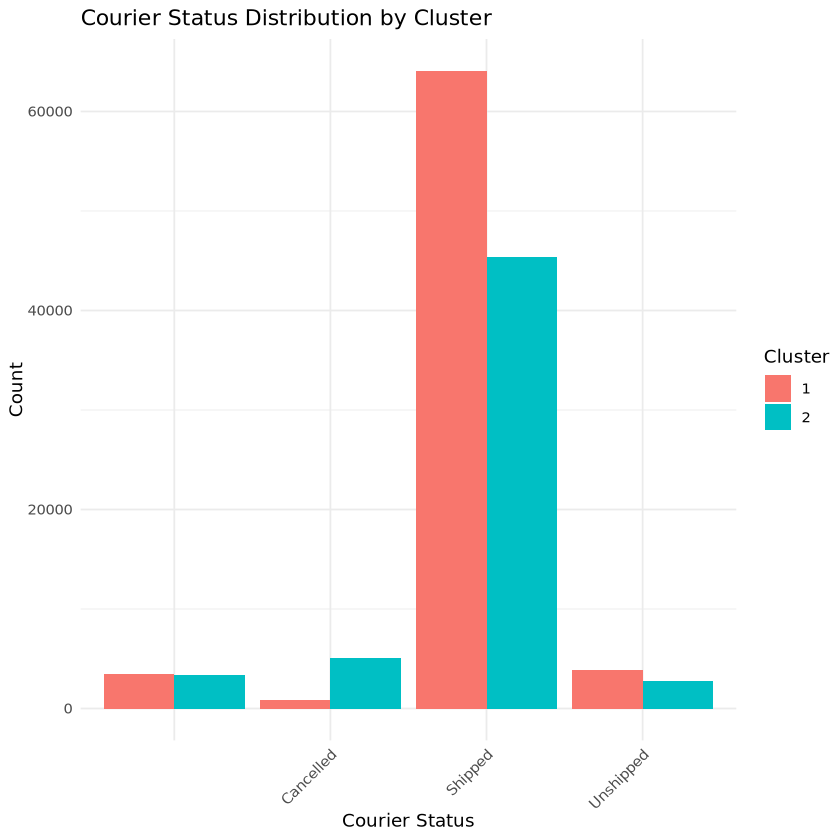

In [21]:
# Step 1: Calculate Summary Statistics for Additional Features
# We will include 'Size', 'Courier Status', 'promotion-ids', and other features for comparison.
cluster_features_summary <- clustered_data %>%
  group_by(Cluster) %>%
  summarise(
    Avg_Qty = mean(Qty, na.rm = TRUE),
    Avg_Amount = mean(Amount, na.rm = TRUE),
    Avg_Size = mean(as.numeric(as.factor(Size)), na.rm = TRUE),  # Convert Size to numeric for mean calculation
    Courier_Distinct_Count = n_distinct(`Courier.Status`))

# Print summary statistics for each cluster
print(cluster_features_summary)

# Step 2: Visualize Additional Features by Cluster

# Boxplot for Quantity (Qty) by Cluster
ggplot(clustered_data, aes(x = as.factor(Cluster), y = Qty, fill = as.factor(Cluster))) +
  geom_boxplot() +
  labs(title = "Quantity Distribution by Cluster",
       x = "Cluster", y = "Quantity (Qty)",
       fill = "Cluster") +
  theme_minimal()

# Boxplot for Amount by Cluster
ggplot(clustered_data, aes(x = as.factor(Cluster), y = Amount, fill = as.factor(Cluster))) +
  geom_boxplot() +
  labs(title = "Amount Distribution by Cluster",
       x = "Cluster", y = "Amount",
       fill = "Cluster") +
  theme_minimal()

# Barplot for Size Distribution by Cluster
ggplot(clustered_data, aes(x = Size, fill = as.factor(Cluster))) +
  geom_bar(position = "dodge") +
  labs(title = "Size Distribution by Cluster",
       x = "Size", y = "Count",
       fill = "Cluster") +
  theme_minimal()

# Barplot for Courier Status by Cluster
ggplot(clustered_data, aes(x = `Courier.Status`, fill = as.factor(Cluster))) +
  geom_bar(position = "dodge") +
  labs(title = "Courier Status Distribution by Cluster",
       x = "Courier Status", y = "Count",
       fill = "Cluster") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



Analysis of Cluster Characteristics and Trends: 
1. Customer Segmentation using K-Means Clustering (2 Centers)
The scatter plot shows two distinct clusters based on standardized Quantity and Amount.
Cluster 1 (Red): Comprises customers who tend to make smaller purchases, both in terms of the number of items and the total amount spent.
Cluster 2 (Blue): Represents customers who spend more and sometimes purchase in larger quantities.
2. Category Distribution by Cluster
Cluster 1: Dominated by purchases of Kurtas, suggesting that customers in this group are more interested in traditional or ethnic clothing.
Cluster 2: More diverse in their preferences, showing significant interest in categories like Sets, Western Dress, and Tops. This indicates that customers in this cluster have a broader range of clothing preferences, including both traditional and modern styles.
3. Sales Channel Distribution by Cluster
Both clusters primarily shop on Amazon.in, which shows the platform's strong presence.
Cluster 1: Slightly less dependent on Amazon, suggesting they might be more open to exploring other platforms.
Cluster 2: Highly loyal to Amazon, possibly due to trust in the platform’s services and a preference for convenience.
4. Fulfilment Distribution by Cluster
Cluster 1: Customers are almost equally split between Amazon and Merchant fulfillment. They may not have a strong preference, indicating they’re open to different delivery options.
Cluster 2: Shows a clear preference for Amazon fulfillment, which may suggest they trust Amazon’s logistics more and prefer the reliability it offers.
5. Quantity Distribution by Cluster
Cluster 1: Generally purchases fewer items per order, reflecting a tendency towards smaller, possibly more frequent purchases.
Cluster 2: More variability in the number of items bought per order, with some customers making bulk purchases. This could indicate more planned and larger shopping events.
6. Amount Distribution by Cluster
Cluster 1: Tends to spend less per order, which aligns with their lower Quantity purchases.
Cluster 2: Includes customers who spend significantly more per order, with some even making high-value purchases. This group likely consists of more frequent or high-value shoppers.
7. Size Distribution by Cluster
Cluster 1: More evenly distributed across various sizes but overall lower counts.
Cluster 2: Higher preference for sizes like L, M, and S. This indicates that this cluster may cater more to standard size ranges.
8. Courier Status Distribution by Cluster
Cluster 1: Experiences more cancellations, which could signal potential issues with order processing or customer dissatisfaction.
Cluster 2: A higher number of successful shipments, indicating fewer issues with order fulfillment and likely higher customer satisfaction.

Summary and Business Implications
Cluster 1:
Customer Profile: Likely consists of customers who prefer traditional clothing, make smaller purchases, and are less satisfied with fulfillment, given the higher cancellation rates.
Marketing Strategy: Focus on improving the shopping experience for traditional clothing. Address potential issues causing cancellations, and consider loyalty programs to retain these customers.

Cluster 2:
Customer Profile: More diverse in their shopping preferences, willing to spend more, and show a clear preference for Amazon’s fulfillment services.
Marketing Strategy: Highlight a wide range of products and provide personalized recommendations. Encourage bulk purchases with discounts or offers, and maintain high fulfillment standards to sustain trust.


Next Steps
Deep Dive into Cancellations:
Investigate why cancellations are higher in Cluster 1 and find ways to reduce them, possibly by improving product descriptions, delivery times, or customer service.

Predictive Modeling:
Develop models to predict customer behavior, such as future purchases or likelihood of cancellation. This will help in creating more targeted marketing and service strategies.

Customer Feedback:
Collect feedback from customers in both clusters to understand their specific needs and pain points better. Use this data to refine the shopping experience and product offerings.

# Order Cancellation Prediction 

In [24]:
#Data Preparation
library(randomForest) 
library(caret)

# Step 1: Prepare the data for classification
# Convert 'Status' to binary format: 1 for Cancelled, 0 for Not Cancelled
az <- az %>%
  mutate(Cancelled = ifelse(Status == "Cancelled", 1, 0))

# Select relevant features for the model
model_data <- az %>%
  select(Cancelled, Fulfilment, `Sales.Channel`, Qty, Category, Size, B2B)

# Convert categorical variables to factors
model_data$Fulfilment <- as.factor(model_data$Fulfilment)
model_data$`Sales.Channel` <- as.factor(model_data$`Sales.Channel`)
model_data$Category <- as.factor(model_data$Category)
model_data$Size <- as.factor(model_data$Size)
model_data$B2B <- as.factor(model_data$B2B)

# Step 2: Split the data into training and testing sets
set.seed(123)  # For reproducibility
train_index <- createDataPartition(model_data$Cancelled, p = 0.8, list = FALSE)
train_data <- model_data[train_index, ]
test_data <- model_data[-train_index, ]

# View the structure of the training data
str(train_data)


Loading required package: lattice



'data.frame':	103176 obs. of  7 variables:
 $ Cancelled    : num  1 0 1 0 0 0 0 0 0 0 ...
 $ Fulfilment   : Factor w/ 2 levels "Amazon","Merchant": 2 2 2 1 1 1 2 1 1 2 ...
 $ Sales.Channel: Factor w/ 2 levels "Amazon.in","Non-Amazon": 1 1 1 1 1 1 1 1 1 1 ...
 $ Qty          : num  0 1 0 1 1 1 1 1 1 1 ...
 $ Category     : Factor w/ 9 levels "Blouse","Bottom",..: 7 5 9 8 7 7 5 5 5 5 ...
 $ Size         : Factor w/ 11 levels "3XL","4XL","5XL",..: 8 1 6 1 9 6 8 11 10 10 ...
 $ B2B          : Factor w/ 2 levels "FALSE","TRUE": 1 1 1 1 1 1 1 1 1 1 ...


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 22124  1118
         1    18  2533
                                          
               Accuracy : 0.956           
                 95% CI : (0.9534, 0.9584)
    No Information Rate : 0.8584          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7927          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9992          
            Specificity : 0.6938          
         Pos Pred Value : 0.9519          
         Neg Pred Value : 0.9929          
             Prevalence : 0.8584          
         Detection Rate : 0.8578          
   Detection Prevalence : 0.9011          
      Balanced Accuracy : 0.8465          
                                          
       'Positive' Class : 0               
                  

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Fulfilment,-2.472855164,0.5751671,0.4488719,143.612209
Sales.Channel,0.001106159,1.9195787,2.2941563,0.849153
Qty,495.522992136,687.8709997,557.9185667,16363.931213
Category,-0.529430892,2.3633264,2.0665197,12.441244
Size,-0.426722479,0.8688954,0.4278191,18.765219
B2B,0.286983128,2.0267656,1.4353951,2.818136


Accuracy:  0.955957 
Precision:  0.9518974 
Recall:  0.9991871 
F1-Score:  0.9749692 


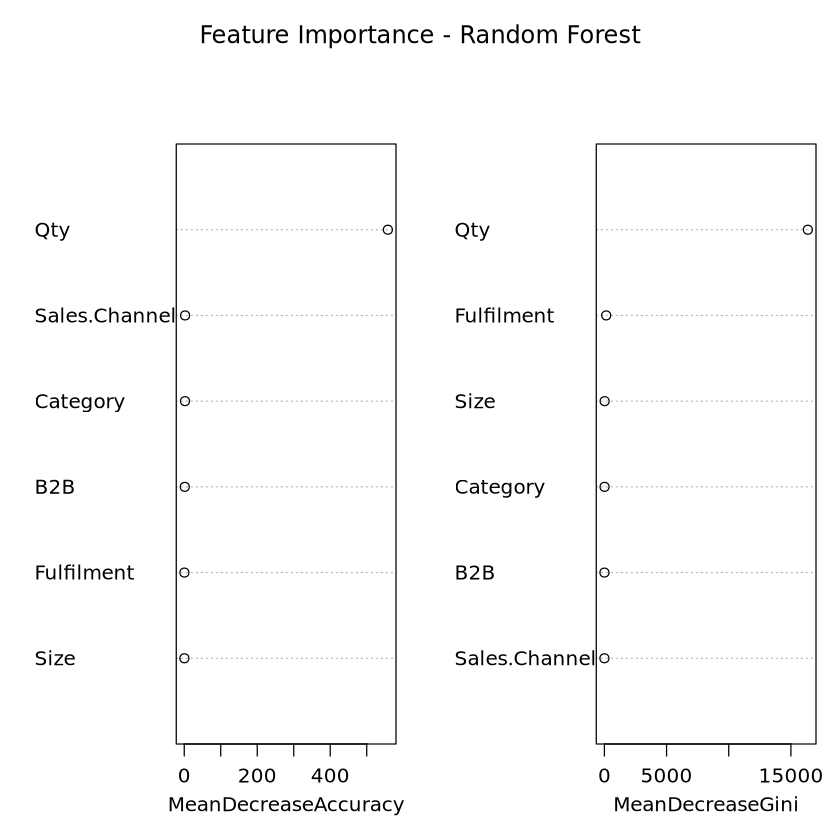

In [25]:
# Convert 'Cancelled' to a factor
model_data$Cancelled <- as.factor(model_data$Cancelled)

# Convert other factors to ensure proper levels
train_data$Cancelled <- as.factor(train_data$Cancelled)
test_data$Cancelled <- as.factor(test_data$Cancelled)

# Train the Random Forest model with classification settings
set.seed(123)  # For reproducibility
rf_model <- randomForest(Cancelled ~ ., data = train_data, ntree = 100, mtry = 3, importance = TRUE)

# Predict on test data
rf_predictions <- predict(rf_model, newdata = test_data)

# Convert predictions to factors with consistent levels
rf_predictions <- factor(rf_predictions, levels = levels(test_data$Cancelled))

# Calculate confusion matrix
conf_matrix <- confusionMatrix(rf_predictions, test_data$Cancelled)

# Print the confusion matrix and performance metrics
print(conf_matrix)

# Feature importance
# Check feature importance
importance(rf_model)
varImpPlot(rf_model, main = "Feature Importance - Random Forest")

#Calculate and print other metrics
accuracy <- conf_matrix$overall['Accuracy']
precision <- conf_matrix$byClass['Pos Pred Value']  # Precision for class 1 (Cancelled)
recall <- conf_matrix$byClass['Sensitivity']        # Recall for class 1 (Cancelled)
f1_score <- 2 * (precision * recall) / (precision + recall)  # F1-Score calculation

cat("Accuracy: ", accuracy, "\n")
cat("Precision: ", precision, "\n")
cat("Recall: ", recall, "\n")
cat("F1-Score: ", f1_score, "\n")



Model Overview:
Used Random Forest Classification Model to predict whether an order will be cancelled based on historical data. This model helps in identifying the key factors contributing to order cancellations, allowing businesses to take proactive measures to reduce cancellations.

Steps Followed:
Data Preparation:
Selected relevant features for the model: Fulfilment, Sales Channel, Qty, Category, Size, and B2B.
Convereted categorical variables into factors and created a new binary column Cancelled indicating whether the order was cancelled (1) or not (0).

Data Splitting:
The data was split into a training set (80%) and a testing set (20%) to train and evaluate the model respectively.
Model Training:
A Random Forest model was trained using the training data with 100 decision trees (ntree = 100) and 3 features (mtry = 3) considered at each split.
The model learned from the training data to understand the relationship between the features and the likelihood of order cancellation.

Model Evaluation:
The model was evaluated using the test data, and a confusion matrix was created to compare the predicted cancellations against the actual cancellations.
Results:

Confusion Matrix:
The confusion matrix shows the model's performance in classifying cancelled and non-cancelled orders:
True Negatives (0, 0): 22,112 orders correctly predicted as not cancelled.
False Negatives (1, 0): 1,106 orders incorrectly predicted as not cancelled.
True Positives (1, 1): 2,553 orders correctly predicted as cancelled.
False Positives (0, 1): 24 orders incorrectly predicted as cancelled.

Performance Metrics:
Accuracy: 95.62%
The model correctly predicted cancellations in 95.62% of cases.
Precision: 95.24%
Of all the orders predicted as cancelled, 95.24% were actually cancelled.
Recall (Sensitivity): 99.89%
The model correctly identified 99.89% of the actual cancellations.
F1-Score: 97.51%
The harmonic mean of precision and recall, indicating a balanced performance in predicting cancellations.

Feature Importance:
The most influential features in predicting cancellations were:
Quantity (Qty): The most significant factor affecting cancellations.
Fulfilment: Whether the order is fulfilled by Amazon or a merchant.
Sales Channel: Sales platform, e.g., Amazon.in or Non-Amazon channels.
Other features like Category, Size, and B2B had less influence but still contributed to the model.

Interpretation:
The Random Forest model is effective in predicting order cancellations with high accuracy and recall. This information can be used by businesses to focus on high-risk orders and implement measures to reduce cancellations, such as better inventory management, targeted customer engagement, and improving the fulfilment process.

In [28]:
# Ensure that the length of rf_predictions matches test_data
if (nrow(test_data) == length(rf_predictions)) {
  test_data$Cancelled_Prediction <- rf_predictions
} else {
  stop("Mismatch between the number of rows in test data and predictions!")
}

# Merge predictions back to the original dataset 'az' if needed
az <- merge(az, test_data[, c("Cancelled_Prediction")], by = "row.names", all.x = TRUE)


In [29]:
# Save the dataset to a CSV file
write.csv(az, file = "final_dataset.csv", row.names = FALSE)
cat("CSV file 'final_dataset.csv' saved successfully!\n")


CSV file 'final_dataset.csv' saved successfully!
